# Минипроект №2.
## Задание
- Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
- Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.- 
- Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
- Проанализируйте CTR с разбивкой по рекламной кампании.
- Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
- Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
- Посчитайте конверсию из клика в покупку.
### Описание данных
- ad_id – идентификатор объявления (рекламы)
- xyz_campaign_id – идентификатор рекламной кампании в базе компании X
- fb_campaign_id – идентификатор кампании в Facebook
- age – возрастная группа, которой показывалась реклама
- gender – пол тех, кому показывалась реклама
- interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
- impressions – число показов
- clicks – число кликов
- spent – сумма, которую компания потратила на показ объявления 
- total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
- approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

### Задание №1.
Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? 

In [2]:
Conversion = pd.read_csv('C:/Users/79196/Projects/data/conversion.csv')
Conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
Conversion.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [4]:
Conversion.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [5]:
Conversion.xyz_campaign_id.nunique()

3

**Ответ:** было проведено 3 уникальных рекламных компаний

### Задание №2.
Постройте график распределения числа показов (**Impressions – сколько раз пользователи увидели данное объявление**) 
для каждой рекламной кампании в Facebook, прологарифмировав значения.
    
Выберите верные утверждения:
- Распределение унимодальное
- Полученное распределение является нормальным
- Полученное распределение не является нормальным
- Распределение симметричное
- Распределение бимодальное

In [6]:
Impressions_by_id = Conversion.groupby(['fb_campaign_id'], as_index= False) \
                              .agg({'Impressions':'sum'})
Impressions_by_id

,fb_campaign_id,Impressions
0,103916,7350
1,103917,17861
2,103920,693
3,103928,8392
4,103929,1915
...,...,...
686,179977,1129773
687,179978,637549
688,179979,151531
689,179981,790253


In [7]:
log_Impressions = np.log(Impressions_by_id.Impressions)
log_Impressions

0       8.902456
1       9.790375
2       6.541030
3       9.035034
4       7.557473
         ...    
686    13.937527
687    13.365386
688    11.928546
689    13.580108
690    13.148345
Name: Impressions, Length: 691, dtype: float64

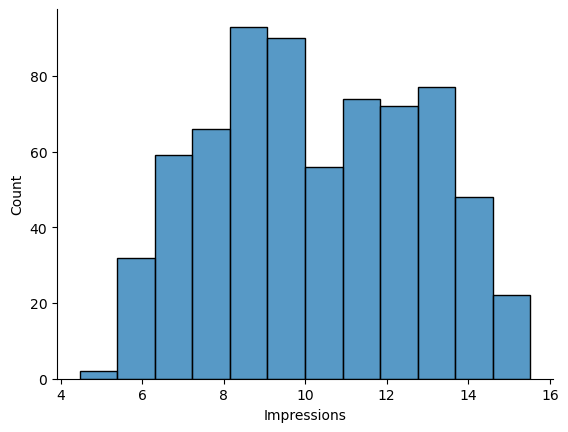

In [8]:
ax = sns.histplot(log_Impressions)
sns.despine()

**Ответ:** 
- Полученное распределение не является нормальным
- Распределение бимодальное

### Задание №3
Теперь посчитаем ещё несколько полезных метрик. Первая – **CTR (click-through rate)**, 
которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.
Создайте новую колонку, затем посмотрите на описательные статистики. 
В качестве ответа укажите **ad_id объявления с наибольшим CTR**.

In [9]:
Conversion['CTR'] = Conversion.Clicks / Conversion.Impressions

In [10]:
Conversion.sort_values('CTR', ascending=False).head(1)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


**Ответ:** ad_id c максимальным CTR = 738637

### Задание №4.
Визуализируйте **CTR** с разбивкой по номеру рекламной кампании (**xyz_campaign_id = 916**).

In [11]:
data_916 = Conversion.query('xyz_campaign_id == 916')

In [12]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

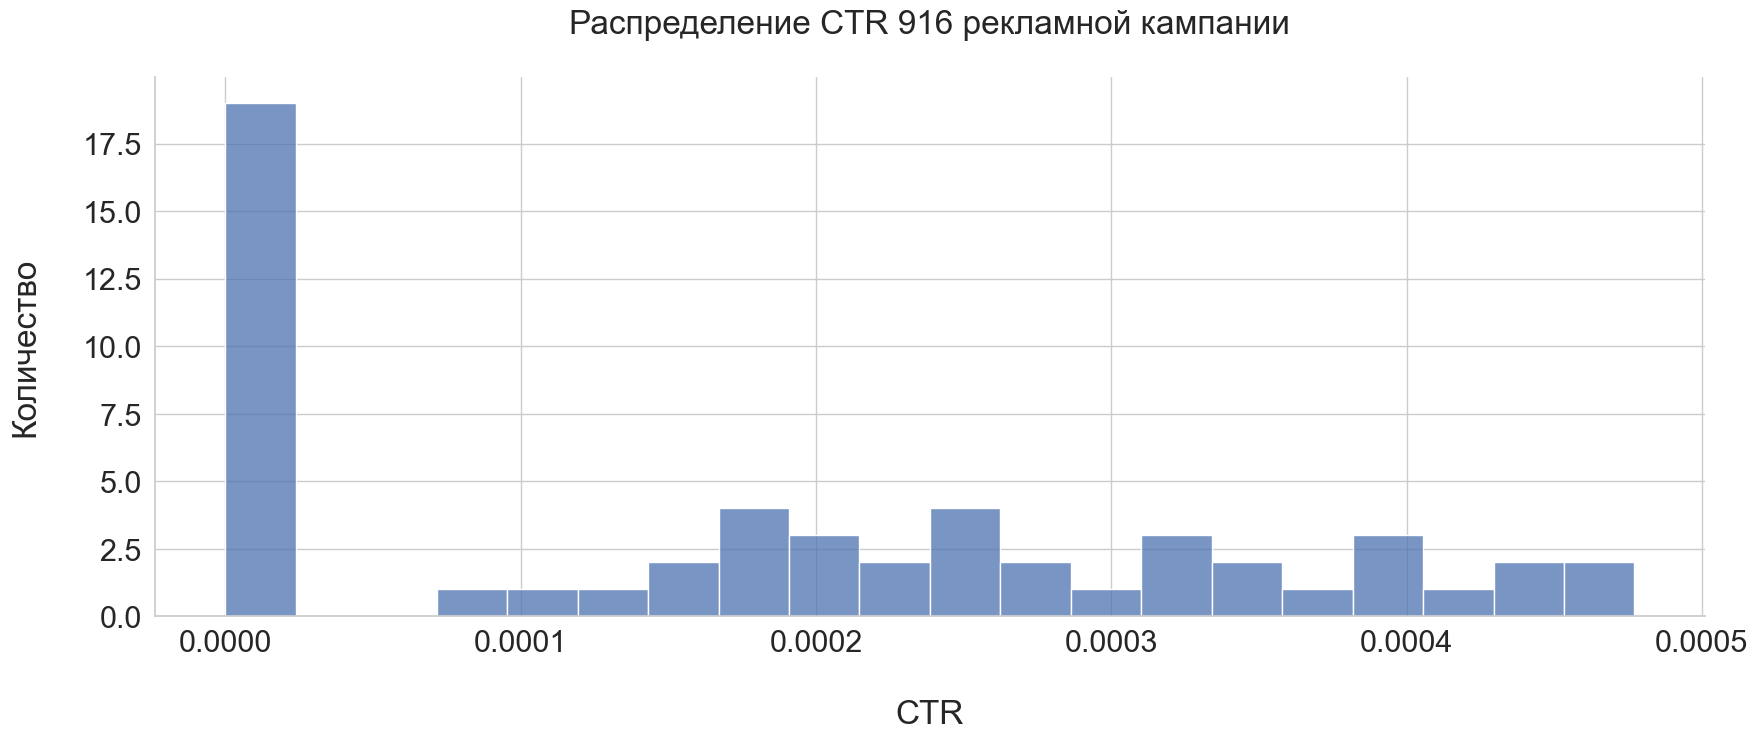

In [13]:
bx = sns.histplot(data_916.CTR, kde=False, bins=20) 
bx.set_title('Распределение CTR 916 рекламной кампании\n')
bx.set_ylabel('Количество\n')
bx.set_xlabel('\nСTR')
sns.despine()

### Задание №5.
**CPC (cost-per-click)** – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов. Постройте график распределения **CPC**.

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. **В ответе укажите межквартильный размах, округленный до двух знаков после точки.**

Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().

In [14]:
Conversion['CPC'] = Conversion.Spent / Conversion.Clicks
Conversion.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [15]:
stats.iqr(Conversion.CPC,  nan_policy = 'omit')

0.2543636990499998

In [16]:
conv_not_null = Conversion.dropna()

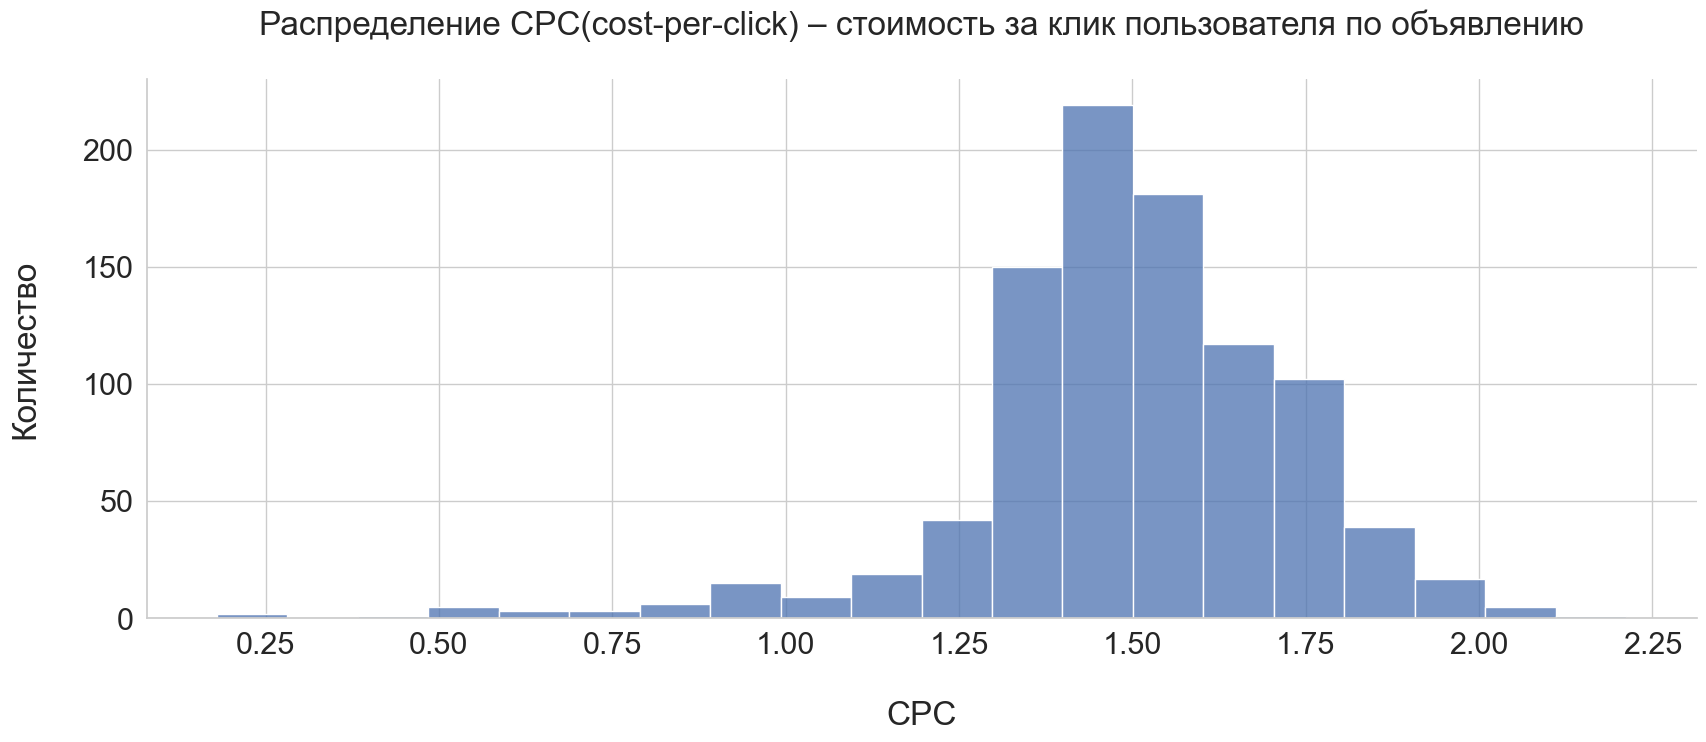

In [17]:
bx1 = sns.histplot(conv_not_null.CPC, kde=False, bins=20) 
bx1.set_title('Распределение CPC(cost-per-click) – стоимость за клик пользователя по объявлению\n')
bx1.set_ylabel('Количество\n')
bx1.set_xlabel('\nСPC')
sns.despine()


**Ответ:** межквартильный размах равен 0.25

### Задание №6.
Визуализируйте **CPC** с разбивкой по полу пользователей, которым были показаны объявления.

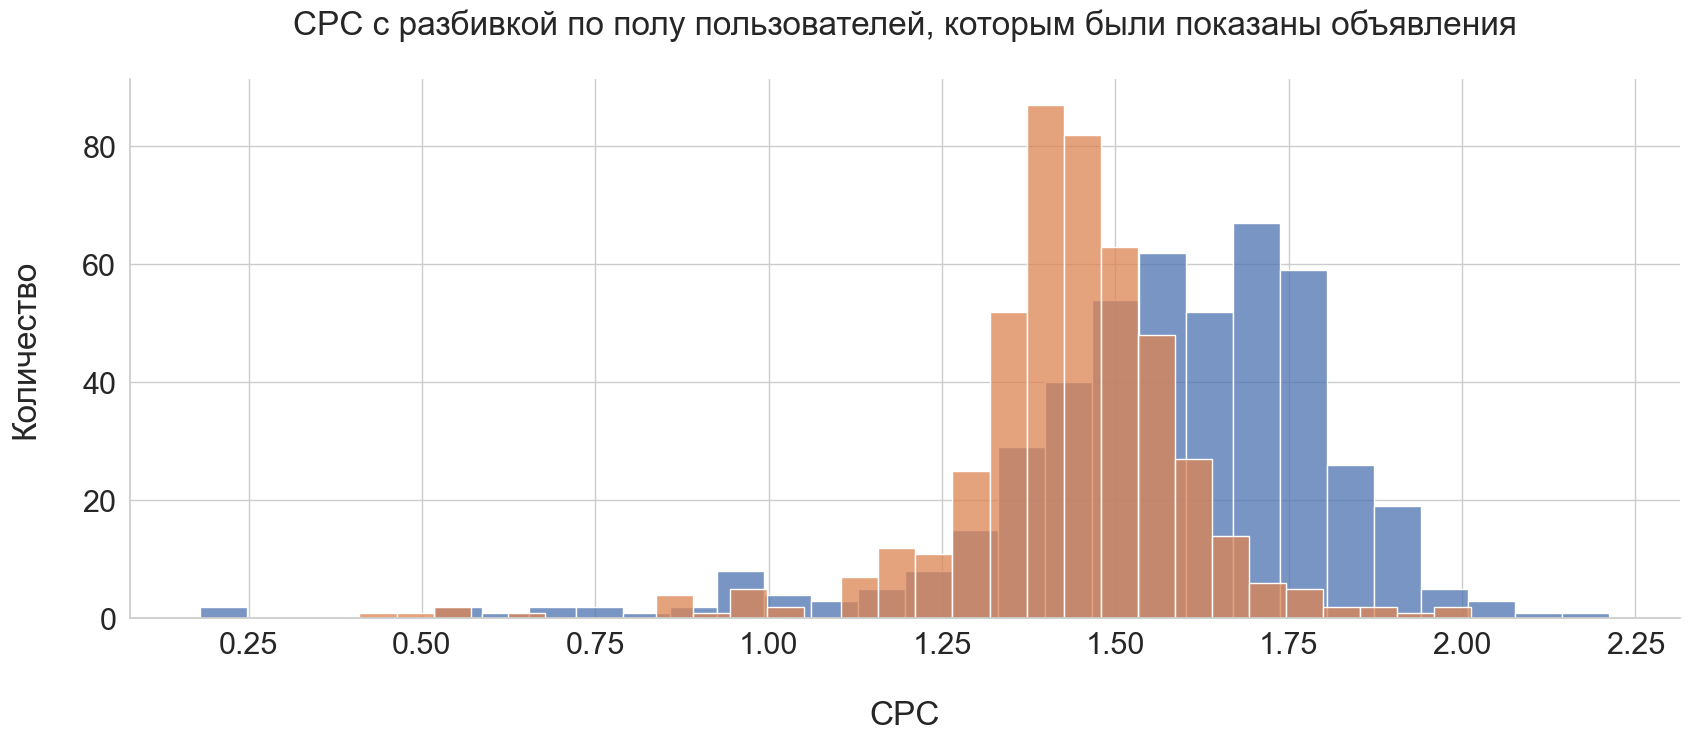

In [18]:
bx2 = sns.histplot(conv_not_null.query('gender == "M"').CPC, kde=False, bins=30)
bx3 = sns.histplot(conv_not_null.query('gender == "F"').CPC, kde=False, bins=30)
bx2.set_title('CPC с разбивкой по полу пользователей, которым были показаны объявления\n')
bx2.set_ylabel('Количество\n')
bx2.set_xlabel('\nСPC')
sns.despine()

### Задание №7.
Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления **1121814** в процентах, округлив значение до 2 знаков после точки.

In [19]:
Conversion['Conversion_rate'] = Conversion.Approved_Conversion / Conversion.Clicks
round(Conversion.query('ad_id == 1121814').Conversion_rate * 100, 2)

860    3.09
Name: Conversion_rate, dtype: float64

**Ответ:** Конверсия в клик у объявления под номером 1121814 равна 3.09 %